# Machine Learning Project: Credit Card Fraud Detection


## Introduction
This project aims to develop an end-to-end solution for detecting fraudulent transactions.
The dataset is obtained from [Kaggle] “Credit Card Fraud Detection” dataset which contains transactions made by credit cards in September 
2013 by European cardholders.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter

# Step 1: Familiarize yourself with the dataset structure
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Check the shape of the dataset (rows, columns)
print(df.shape)

# Get dataset information (column names, non-null counts, data types)
print("Dataset Info:\n")
df.info()

# Display first 5 rows
print("\nFirst 5 rows:\n", df.head())


(284807, 31)
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-n


Missing Values:
 0

Summary Statistics:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   


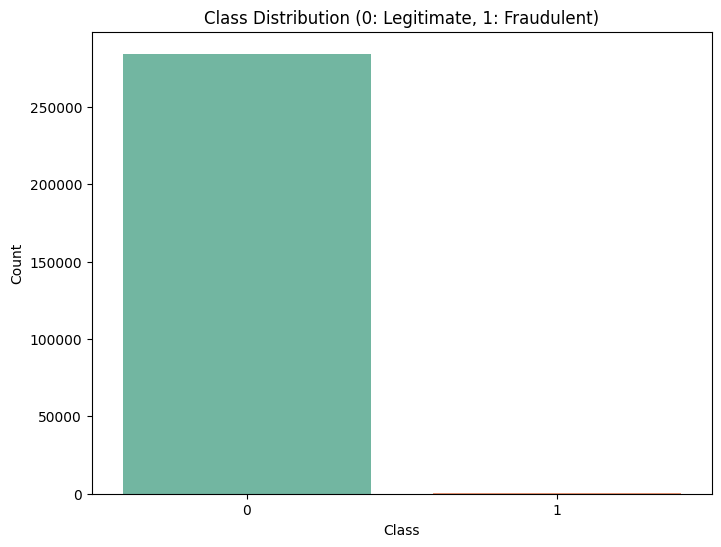

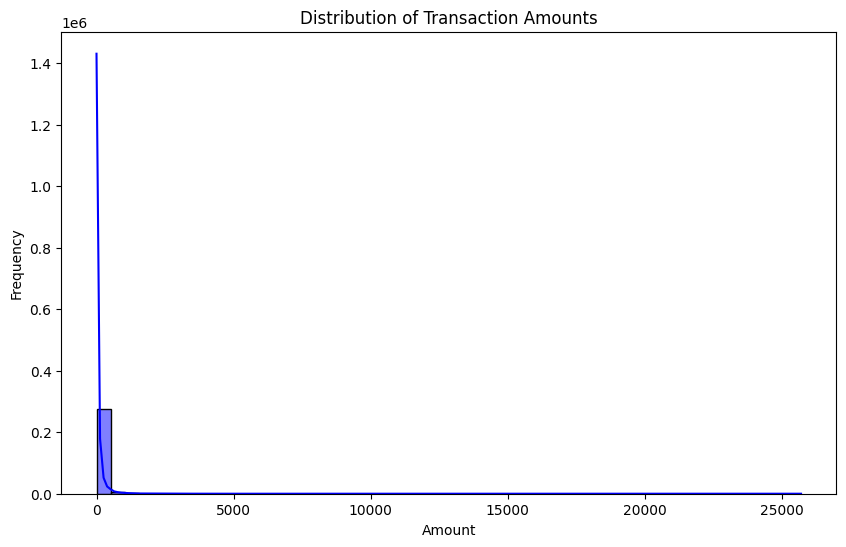

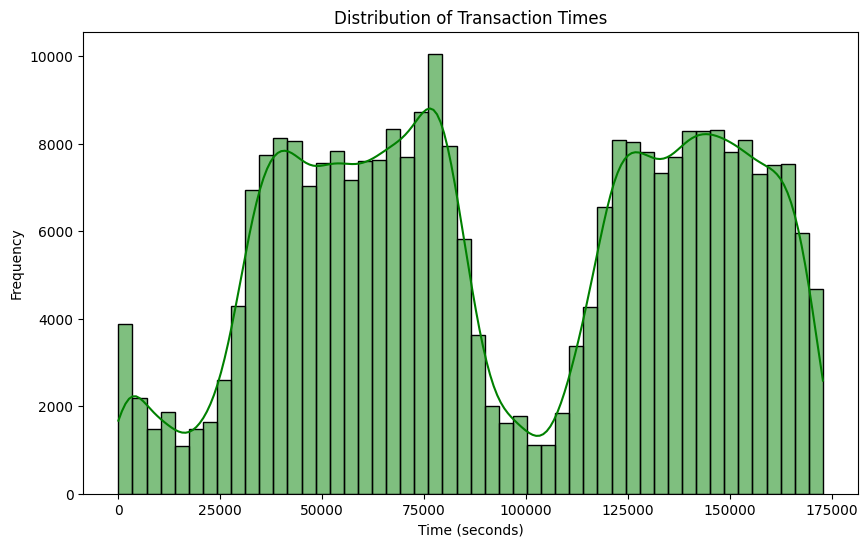

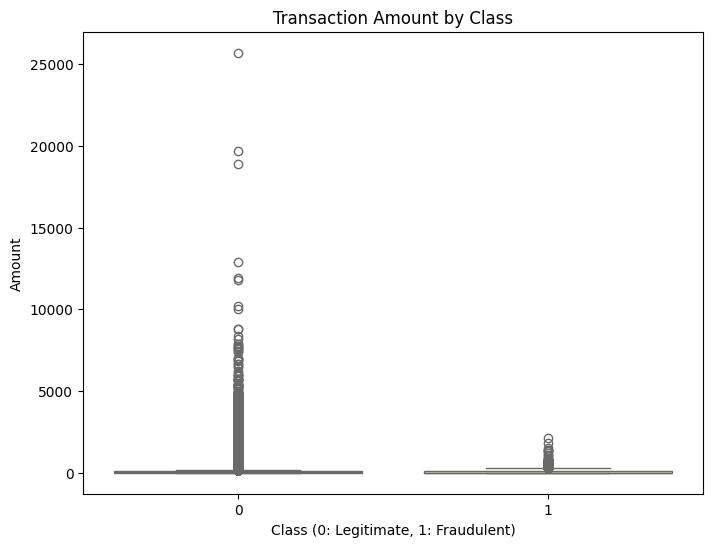

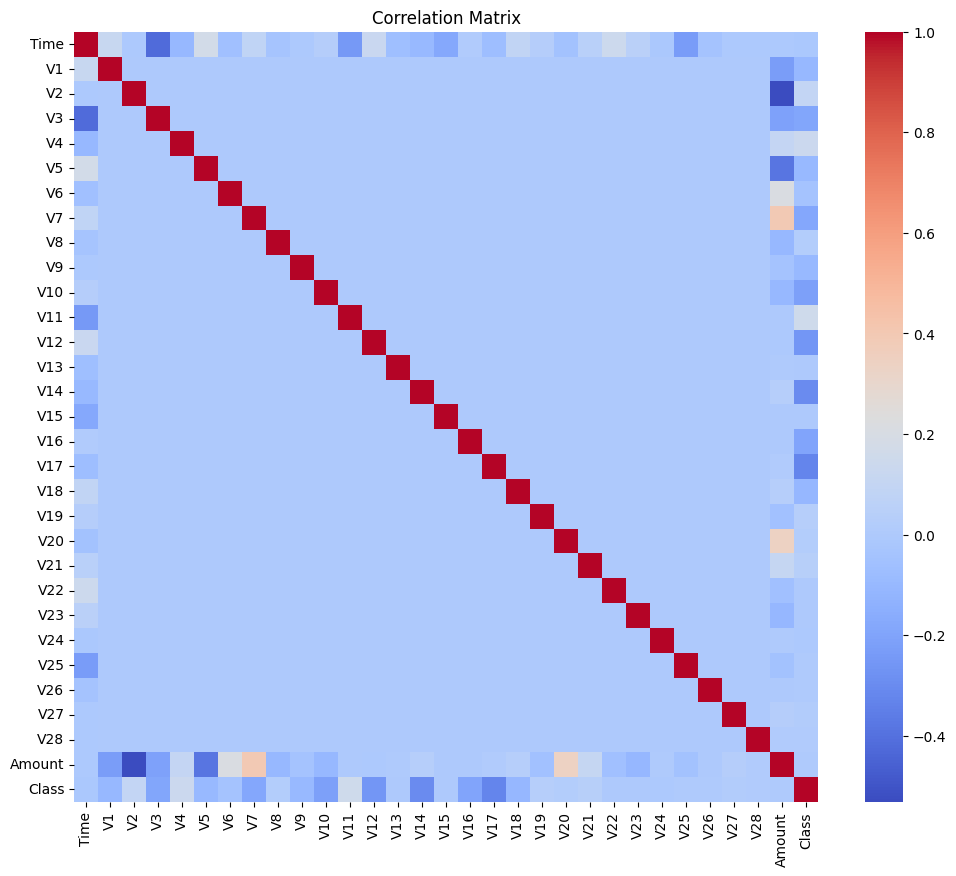

In [22]:
# Step 2: Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum().sum())

# Summary statistics for numerical columns
print("\nSummary Statistics:\n", df.describe())

# Check the distribution of the target variable (Class)
print("\nDistribution of the target variable (Class):")
print(df['Class'].value_counts())

# Visualize the class imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette='Set2', hue='Class', legend=False)
plt.title('Class Distribution (0: Legitimate, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Analyze the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Analyze the distribution of transaction times
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, kde=True, color='green')
plt.title('Distribution of Transaction Times')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

# Check for outliers in the 'Amount' column using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette='Set3', hue='Class', legend=False)
plt.title('Transaction Amount by Class')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Amount')
plt.show()

# Correlation matrix to understand relationships between features
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Handling Missing Values
The dataset is generally clean, but it's always good practice to check for missing values explicitly.

Approach:
If there are missing values, we can:
                
Remove rows with missing values (if the number is small).

Impute missing values using techniques like mean, median, or mode (if applicable).


In [23]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# If there are missing values, handle them
if df.isnull().sum().any():
    # Option 1: Drop rows with missing values
    df = df.dropna()
    
    # Option 2: Impute missing values (e.g., with the median for numerical columns)
    # df['ColumnName'].fillna(df['ColumnName'].median(), inplace=True)
else:
    print("No missing values found.")

Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
No missing values found.


# Handling Outliers
Outliers can affect the performance of machine learning models, especially in fraud detection.

Approach:
The dataset consists of anonymized PCA features (V1–V28), making direct interpretation difficult.
We focus on the 'Amount' column to detect and address outliers.
Method: We use Interquartile Range (IQR) to remove extreme values.

Decide whether to remove or transform outliers based on domain knowledge.

In [24]:
# Detect outliers using the IQR method for the 'Amount' column
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(f"Number of outliers in 'Amount': {len(outliers)}")

# Option 1: Remove outliers
df_cleaned = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

# Option 2: Cap outliers (replace them with the upper/lower bounds)
# df['Amount'] = df['Amount'].clip(lower_bound, upper_bound)

print(f"Dataset shape before removing outliers: {df.shape}")
print(f"Dataset shape after removing outliers: {df_cleaned.shape}")

Number of outliers in 'Amount': 31904
Dataset shape before removing outliers: (284807, 31)
Dataset shape after removing outliers: (252903, 31)


#  Handling Class Imbalance
The dataset is highly imbalanced, with fraudulent transactions being rare (0.17% of the dataset). This can bias the model toward the majority class.

Approach:
Resampling Techniques:

Oversampling: Increase the number of minority class samples (using SMOTE to generate synthetic fraud sample).

Undersampling: Reduce the number of majority class samples (non-fraud).

Hybrid Approach: Combine oversampling and undersampling.

In [36]:
# Separate features and target variable
X = df_cleaned.drop('Class', axis=1) # Remove the "Class" column from the data and store the remaining features in X
y = df_cleaned['Class'] # Store the target variable (Class) in y

# Check class distribution
print("Class distribution before resampling:")
print(Counter(y))

# Option 1: Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y) # Generates new data and stores the output in X_resampled and y_resampled.

# Option 2: Undersampling the majority class
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Option 3: Hybrid approach (SMOTE + Undersampling)
over = SMOTE(sampling_strategy=0.1, random_state=42) # Increase the fraud class to 10% of the total data
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42) # Reduce the legitimate class to 50% of the total data
pipeline = Pipeline(steps=[('over', over), ('under', under)])
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Check class distribution after resampling
print("Class distribution after resampling:")
print(Counter(y_resampled))

Class distribution before resampling:
Counter({0: 252502, 1: 401})
Class distribution after resampling:
Counter({0: 50500, 1: 25250})


# Final Dataset
After cleaning and resampling, the dataset is ready for modeling.

In [37]:
# Combine resampled features and target into a single DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Class'] = y_resampled

# Save the cleaned and resampled dataset
resampled_df.to_csv('cleaned_resampled_creditcard.csv', index=False)